In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase
import ase.io

In [2]:
classical=np.loadtxt('classical_sim.txt')
classical_energies=classical[:,4]*0.043364

In [3]:
input_file = 'me-rigid-shortaug3-gscc.xyz'
energy = "energy"
frames = ase.io.read(input_file,":")
energies = np.array([cc.info[energy] for cc in frames])

In [4]:
CC_distances = []
for frame in frames:
    distances = frame.get_all_distances()
    CC_distances.append(distances[5][0])

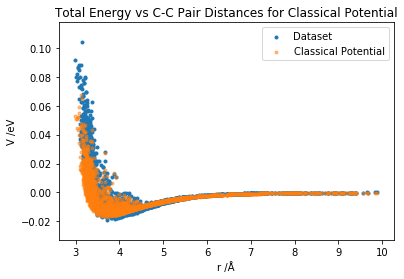

In [5]:
plt.scatter(CC_distances, energies, marker = ".", label="Dataset")
plt.scatter(CC_distances, classical_energies, marker=".", label="Classical Potential", alpha=0.5)
plt.xlabel("r /Å")
plt.ylabel("V /eV")
plt.title("Total Energy vs C-C Pair Distances for Classical Potential")
plt.legend()
plt.show()

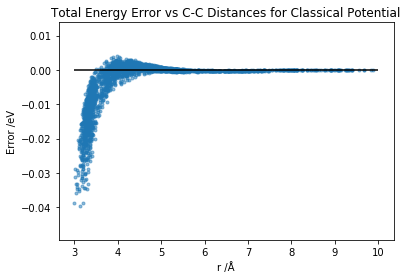

In [6]:
plt.scatter(CC_distances, classical_energies-energies, marker=".",alpha=0.5)
plt.hlines(0, 3,10)
plt.xlabel("r /Å")
plt.ylabel("Error /eV")
plt.title("Total Energy Error vs C-C Distances for Classical Potential")
plt.show()

In [7]:
np.sqrt(np.mean((classical_energies-energies)**2))/2

0.004314944276908584

In [8]:
def LJ_9_6(r_0,e,r):
    "Compute an LJ-9-6 potential"
    return e*(2*(r_0/r)**9-3*(r_0/r)**6)*0.043364

In [9]:
rs_CC = np.linspace(3, 10, 2418)
CC_energies = LJ_9_6(3.854,0.062,rs_CC)

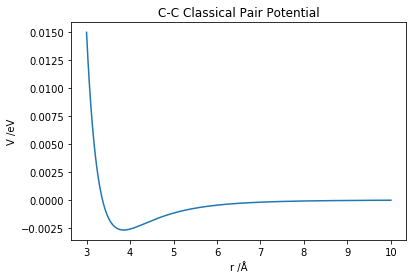

In [10]:
plt.plot(rs_CC, CC_energies,marker="", linestyle="-")
plt.xlabel("r /Å")
plt.ylabel("V /eV")
plt.title("C-C Classical Pair Potential")
plt.show()

In [11]:
rs_HH = np.linspace(2.25, 10, 2418)
HH_energies = LJ_9_6(2.878, 0.023,rs_HH)

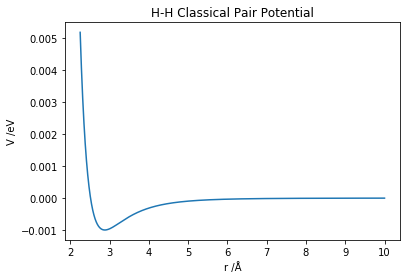

In [12]:
plt.plot(rs_HH, HH_energies,marker="", linestyle="-")
plt.xlabel("r /Å")
plt.ylabel("V /eV")
plt.title("H-H Classical Pair Potential")
plt.show()

In [13]:
rs_CH = np.linspace(2.75, 10, 2418)
CH_energies = LJ_9_6(3.526,0.0268 ,rs_CH)

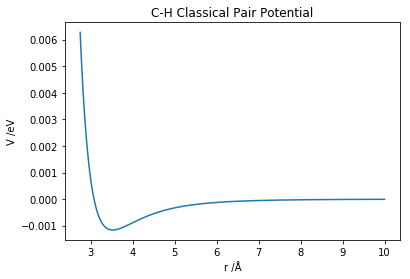

In [14]:
plt.plot(rs_CH, CH_energies,marker="", linestyle="-")
plt.xlabel("r /Å")
plt.ylabel("V /eV")
plt.title("C-H Classical Pair Potential")
plt.show()